In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

In [2]:
#Importing the dataset
from sklearn.datasets import load_boston
df = load_boston()
df1 = pd.DataFrame(df.data, columns=df.feature_names)


In [3]:
#Taking a glance at the dataset
df1.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [4]:
df1['Target'] = df.target #Getting target data from boston package

In [5]:
df1.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#Now looking at this we need to find which can be categorial

In [8]:
df1['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [9]:
df1['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [10]:
df1['CHAS'] = df1['CHAS'].astype('object')
df1['RAD'] = df1['RAD'].astype('object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    object 
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(12), object(2)
memory usage: 55.5+ KB


In [12]:
#we have converted two columns into categorical

In [13]:
df1.describe(percentiles=[0.50]).T.round(2)

,count,mean,std,min,50%,max
CRIM,506.0,3.61,8.60,0.01,0.26,88.98
ZN,506.0,11.36,23.32,0.00,0.00,100.00
INDUS,506.0,11.14,6.86,0.46,9.69,27.74
NOX,506.0,0.55,0.12,0.38,0.54,0.87
RM,506.0,6.28,0.70,3.56,6.21,8.78
AGE,506.0,68.57,28.15,2.90,77.50,100.00
DIS,506.0,3.80,2.11,1.13,3.21,12.13
TAX,506.0,408.24,168.54,187.00,330.00,711.00
PTRATIO,506.0,18.46,2.16,12.60,19.05,22.00
B,506.0,356.67,91.29,0.32,391.44,396.90


EDA

In [14]:
df1.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [15]:
#check for null values
df1.isnull().sum().sum()

0

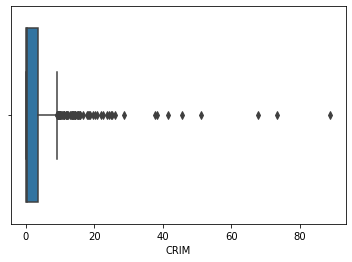

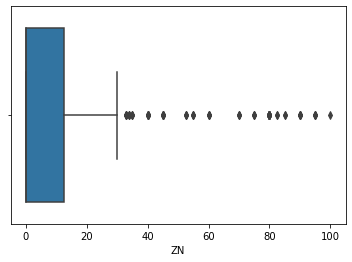

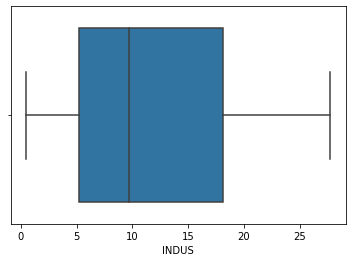

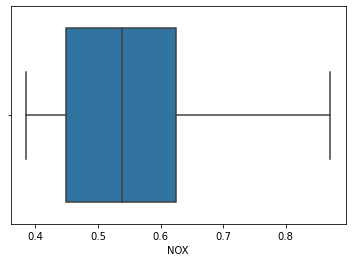

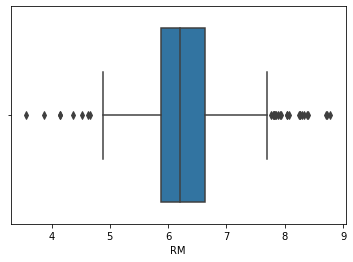

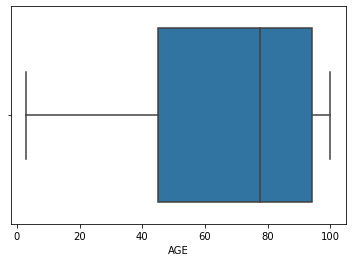

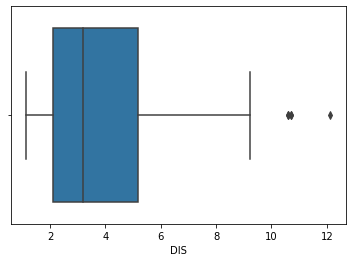

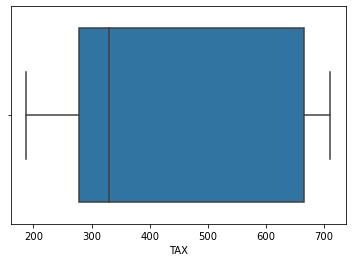

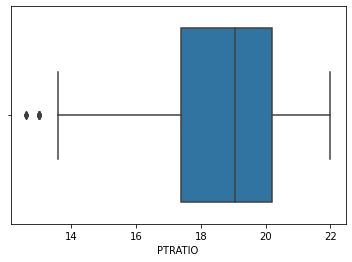

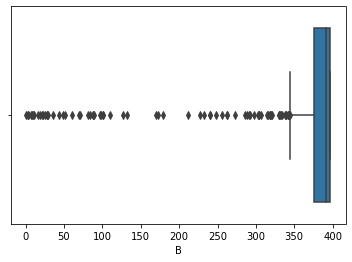

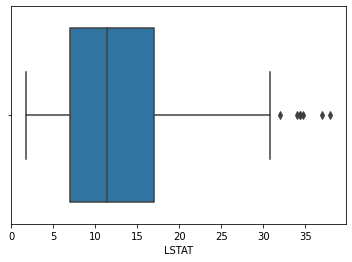

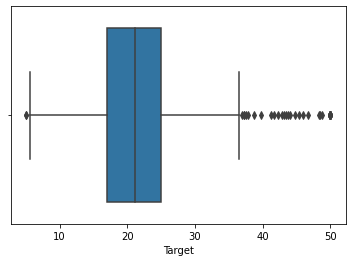

In [16]:
#check for outliers
for i in df1.select_dtypes(include=np.number).columns:
    sns.boxplot(df1[i])
    plt.show()

In [17]:
#we have loads of outliers in all the data so we have to remove the outliers :> 
#IQR or ZScore
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    df1[i]=df1[i].apply(lambda x:df1[i].quantile(0.99) if x>ub else df1[i].quantile(0.01) if x<lb else x)

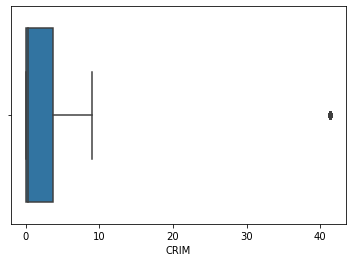

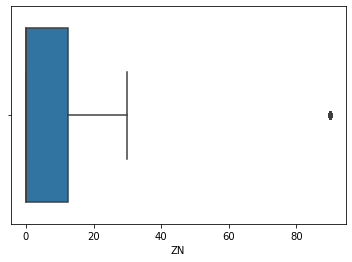

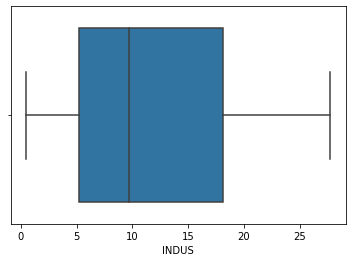

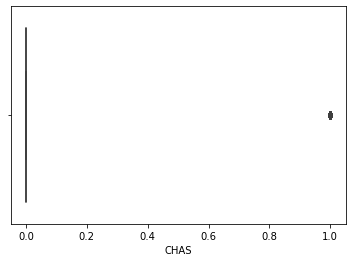

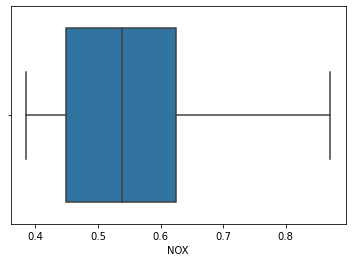

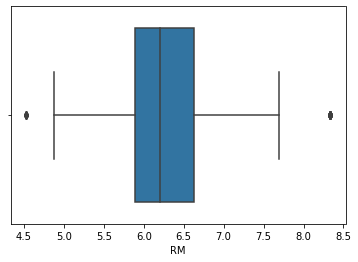

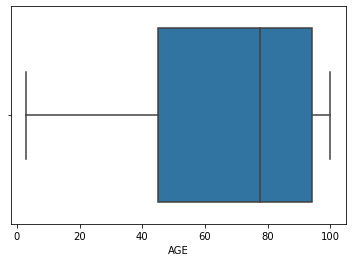

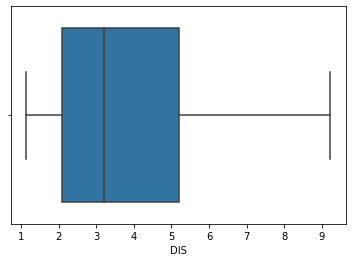

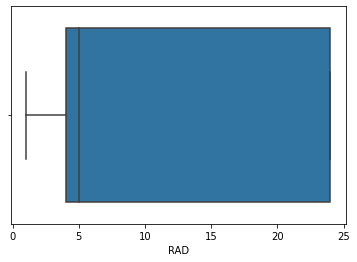

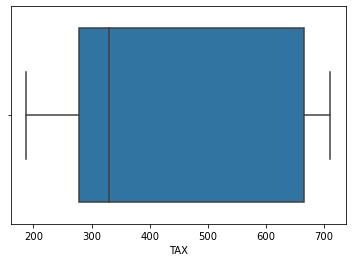

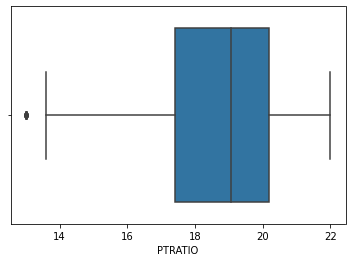

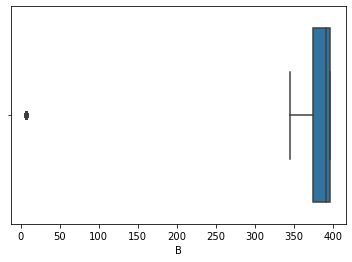

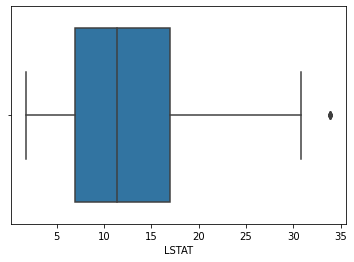

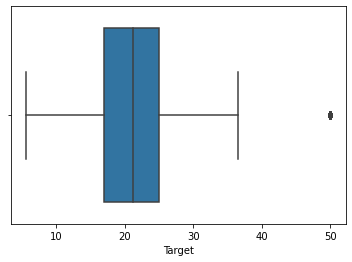

In [18]:
for i in df1.select_dtypes(include=np.number).columns:
    sns.boxplot(df1[i])
    plt.show()

In [19]:
#Since we have some outliers, it's time for us to check how the columns fare with each other

In [20]:
#sns.pairplot(df1.select_dtypes(include=np.number))

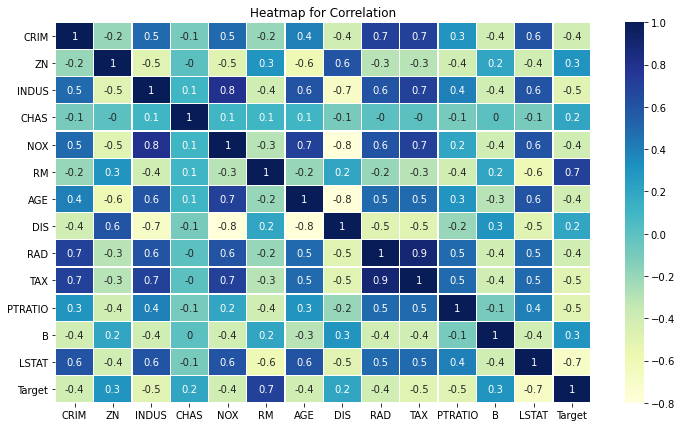

In [21]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(12,7))
plt.title('Heatmap for Correlation')
sns.heatmap(corr.round(1), cmap='YlGnBu', annot=True, linewidth=0.30, ax=ax)

In [22]:
#RM has high positive correlation with target
#Indus has highest negative correlation with target

Model Building

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
inp = df1.drop(['Target', "CHAS", "RAD"],1)
out = df1[['Target']]

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(inp,out, test_size=0.30, random_state=2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(354, 11)
(354, 1)
(152, 11)
(152, 1)


In [26]:
inpc = sm.add_constant(xtrain)
inpc.shape

(354, 12)

In [27]:
model = sm.OLS(ytrain,inpc)
mod = model.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     79.03
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           6.28e-87
Time:                        22:28:46   Log-Likelihood:                -1090.6
No. Observations:                 354   AIC:                             2205.
Df Residuals:                     342   BIC:                             2252.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5131      6.606      4.013      0.000      13.519      39.507
CRIM          -0.0420      0.033     -1.289      0.198      -0.106       0.022
ZN             0.0061      0.013      0.453      0.651      -0.020       0.033
INDUS         -0.1011      0.078     -1.300      0.194      -0.254       0.052
NOX          -14.0104      5.088     -2.754      0.006     -24.018      -4.002
RM             5.1973      0.539      9.650      0.000       4.138       6.257
AGE            0.0175      0.018      0.954      0.341      -0.019       0.054
DIS           -1.3627      0.262     -5.210      0.000      -1.877      -0.848
TAX            0.0028      0.003      0.870      0.385      -0.004       0.009
PTRATIO       -1.0749      0.178     -6.044      0.000      -1.425      -0.725
B              0.0075      0.003      2.980      0.003       0.003       0.012
LSTAT         -0.5657      0.076     -7.438      0.000      -0.715      -0.416
==============================================================================
Omnibus:                      110.902   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.233
Skew:                           1.355   Prob(JB):                     3.35e-87
Kurtosis:                       7.434   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#We now do linear regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(inpc,ytrain)

LinearRegression()

In [31]:
lr.score(inpc,ytrain)

0.7176644422098314

In [32]:
#Our base model is not upto the mark so we are gonna fine tune it.

In [33]:
from sklearn.feature_selection import RFECV


In [34]:
corr1 = set()
corr_matrix = df1.drop('Target',1)

In [35]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            col = corr_matrix.columns[i]
            corr1.add(col)

In [36]:
corr1

{'AGE', 'B', 'CHAS', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX'}

In [37]:
x1 = df1.drop('Target', 1)
y1 = df1['Target']
rfc = RFECV(estimator = lr)

In [38]:
rfe_mod = rfc.fit(x1,y1)

In [39]:
rfe_mod.ranking_

array([4, 5, 2, 1, 1, 1, 7, 1, 3, 6, 1, 8, 1])

In [40]:
len(df1.columns)

14

In [41]:
rank = pd.DataFrame()
rank['Col_Names'] = x1.columns
rank['Rank'] = rfe_mod.ranking_
rank

,Col_Names,Rank
0,CRIM,4
1,ZN,5
2,INDUS,2
3,CHAS,1
4,NOX,1
5,RM,1
6,AGE,7
7,DIS,1
8,RAD,3
9,TAX,6


In [42]:
mask = rank['Rank']==1

In [43]:
ranked = rank[(mask)]
ranked

,Col_Names,Rank
3,CHAS,1
4,NOX,1
5,RM,1
7,DIS,1
10,PTRATIO,1
12,LSTAT,1


In [44]:
c1 = df1[['NOX', 'RM', "DIS", "PTRATIO", "LSTAT"]]

In [45]:
c2 = pd.get_dummies(df1['CHAS'])

In [46]:
df1['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [47]:
inp1 = pd.concat([c1,c2], 1)
out1 = df1['Target']

In [48]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(inp1, out1, test_size = 0.3, random_state=10)
print(xtrain1.shape, xtest1.shape, ytrain1.shape, ytest1.shape)

(354, 7) (152, 7) (354,) (152,)


In [49]:
inp_co = sm.add_constant(xtrain1)
inp_co.shape

(354, 8)

In [50]:
mod = sm.OLS(ytrain1, inp_co).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           2.36e-91
Time:                        22:28:46   Log-Likelihood:                -1073.3
No. Observations:                 354   AIC:                             2161.
Df Residuals:                     347   BIC:                             2188.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1085      3.927      5.630      0.000      14.384      29.833
NOX          -20.2034      4.082     -4.950      0.000     -28.232     -12.175
RM             4.9546      0.509      9.738      0.000       3.954       5.955
DIS           -1.2763      0.220     -5.809      0.000      -1.708      -0.844
PTRATIO       -0.9569      0.140     -6.814      0.000      -1.233      -0.681
LSTAT         -0.5760      0.059     -9.810      0.000      -0.691      -0.460
0.0           10.2494      1.992      5.145      0.000       6.332      14.167
1.0           11.8591      2.110      5.620      0.000       7.709      16.009
==============================================================================
Omnibus:                      123.674   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.004
Skew:                           1.460   Prob(JB):                    4.45e-114
Kurtosis:                       8.183   Cond. No.                     1.14e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
lr = LinearRegression()
lr.fit(inp_co,ytrain1)
lr.score(inp_co,ytrain1)

0.7147633319111653

In [52]:
c1.head()

,NOX,RM,DIS,PTRATIO,LSTAT
0,0.538,6.575,4.0900,15.3,4.98
1,0.469,6.421,4.9671,17.8,9.14
2,0.469,7.185,4.9671,17.8,4.03
3,0.458,6.998,6.0622,18.7,2.94
4,0.458,7.147,6.0622,18.7,5.33


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
ins = sc.fit_transform(c1)
ins1 = pd.DataFrame(ins,columns=c1.columns)
ins1.head()

,NOX,RM,DIS,PTRATIO,LSTAT
0,-0.144217,0.391805,0.152084,-1.464302,-1.080587
1,-0.740262,0.174310,0.579678,-0.305067,-0.493670
2,-0.740262,1.253314,0.579678,-0.305067,-1.214619
3,-0.835284,0.989212,1.113549,0.112258,-1.368403
4,-0.835284,1.199646,1.113549,0.112258,-1.031207


In [55]:
scaled = pd.concat([ins1,c2],1)
scaled.head()

,NOX,RM,DIS,PTRATIO,LSTAT,0.0,1.0
0,-0.144217,0.391805,0.152084,-1.464302,-1.080587,1,0
1,-0.740262,0.174310,0.579678,-0.305067,-0.493670,1,0
2,-0.740262,1.253314,0.579678,-0.305067,-1.214619,1,0
3,-0.835284,0.989212,1.113549,0.112258,-1.368403,1,0
4,-0.835284,1.199646,1.113549,0.112258,-1.031207,1,0


In [56]:
import scipy.stats as st


In [57]:
out = df1['Target']

In [58]:
box_out, lam = st.boxcox(out)

In [59]:
const = sm.add_constant(scaled)
modsc = sm.OLS(box_out,const).fit()

In [60]:
modsc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     257.4
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          3.11e-149
Time:                        22:28:47   Log-Likelihood:                -25.253
No. Observations:                 506   AIC:                             64.51
Df Residuals:                     499   BIC:                             94.09
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3071      0.015    151.741      0.000       2.277       2.337
NOX           -0.1326      0.020     -6.715      0.000      -0.171      -0.094
RM             0.1147      0.015      7.656      0.000       0.085       0.144
DIS           -0.1167      0.019     -6.267      0.000      -0.153      -0.080
PTRATIO       -0.1120      0.013     -8.808      0.000      -0.137      -0.087
LSTAT         -0.2770      0.018    -15.657      0.000      -0.312      -0.242
0.0            1.0755      0.017     64.087      0.000       1.042       1.108
1.0            1.2317      0.030     41.382      0.000       1.173       1.290
==============================================================================
Omnibus:                       40.486   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.514
Skew:                           0.380   Prob(JB):                     4.50e-24
Kurtosis:                       5.127   Cond. No.                     2.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
lr = LinearRegression()
lr.fit(scaled,box_out)
lr.score(scaled,box_out)

0.7558151317501463

In [62]:
#As you can see we have improved the model from 71% to 75% and in the further stuffs we will increase it more.

In [ ]:
#we are gonna improve this more

In [63]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score


In [105]:
#Cross val score
mod_lr = LinearRegression()
res = cross_val_score(mod_lr, scaled, box_out, cv=3, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = ve/be
res_lr = [be,ve, cve]
res_lr

[0.3158076724431447, 0.1066008701624824, 0.3375499693778779]

In [99]:
#Ridge  : 1
mod_rid = Ridge(alpha = 1) #we should use scaled version of data for Ridge, or pass Normalize = True under Ridge() to do it internally
res = cross_val_score(mod_rid,scaled,box_out, cv = 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = ve/be
res_rid_1 = [be,ve,cve]
res_rid_1

[0.3151616539457307, 0.1071184287645093, 0.33988407987906605]

In [100]:
#Ridge = 5
mod_rid = Ridge(alpha = 5) #we should use scaled version of data for Ridge, or pass Normalize = True under Ridge() to do it internally
res = cross_val_score(mod_rid,scaled,box_out, cv = 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = ve/be
res_rid_5 = [be,ve,cve]
res_rid_5

[0.3129797512515091, 0.10895384256020432, 0.3481178642532996]

In [101]:
#Ridge = 10
mod_rid = Ridge(alpha = 10) #we should use scaled version of data for Ridge, or pass Normalize = True under Ridge() to do it internally
res = cross_val_score(mod_rid,scaled,box_out, cv = 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = ve/be
res_rid_10 = [be,ve,cve]
res_rid_10

[0.31091199191056246, 0.11086362858208143, 0.35657559523780824]

In [102]:
#Lasso 0.01
mod_las = Lasso(alpha = 0.01) 
res = cross_val_score(mod_las,scaled,box_out, cv = 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = ve/be
res_las = [be,ve,cve]
res_las

[0.32738667374318414, 0.1209924294146996, 0.369570416630981]

In [103]:
#EnET
mod_enet = ElasticNet(alpha = 0.008) 
res = cross_val_score(mod_enet,scaled,box_out, cv = 3, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = ve/be
res_enet = [be,ve,cve]
res_enet

[0.31835144800365356, 0.1139996864515077, 0.35809382104710696]

In [107]:
score = pd.DataFrame()
score['LR'] = res_lr
score['Ridge_1'] = res_rid_1
score['Ridge_5'] = res_rid_5
score['Ridge_10'] = res_rid_10
score['Lasso'] = res_las
score['Enet'] = res_enet
score.index = ['Bias Error','Variance Error','Coefficient of Variance']


In [108]:
score

,LR,Ridge_1,Ridge_5,Ridge_10,Lasso,Enet
Bias Error,0.315808,0.315162,0.312980,0.310912,0.327387,0.318351
Variance Error,0.106601,0.107118,0.108954,0.110864,0.120992,0.114000
Coefficient of Variance,0.337550,0.339884,0.348118,0.356576,0.369570,0.358094


In [112]:
mod_lr = LinearRegression()
mod_lr.fit(scaled,box_out)
coef = mod_lr.coef_
coef

array([-0.13257351,  0.11468679, -0.1166823 , -0.11198379, -0.27703364,
       -0.07809809,  0.07809809])

In [113]:
coef1 = pd.DataFrame()
coef1['LR'] = mod_lr.coef_

In [114]:
mod_rid = Ridge(alpha = 1)
mod_rid.fit(scaled,box_out)
coef1['Ridge_1'] = mod_rid.coef_

In [115]:
mod_rid = Ridge(alpha = 5)
mod_rid.fit(scaled,box_out)
coef1['Ridge_5'] = mod_rid.coef_

In [116]:
mod_rid = Lasso(alpha = 0.05)
mod_rid.fit(scaled,box_out)
coef1['Lasso_0.05'] = mod_rid.coef_

In [117]:
mod_rid = ElasticNet(alpha = 0.008)
mod_rid.fit(scaled,box_out)
coef1['ElasticNet_0.08'] = mod_rid.coef_

In [118]:
coef1.index = scaled.columns
coef1

,LR,Ridge_1,Ridge_5,Lasso_0.05,ElasticNet_0.08
NOX,-0.132574,-0.131712,-0.128443,-0.003930,-0.112575
RM,0.114687,0.115061,0.116475,0.103526,0.116151
DIS,-0.116682,-0.115485,-0.110877,-0.000000,-0.096791
PTRATIO,-0.111984,-0.111867,-0.111402,-0.069979,-0.108748
LSTAT,-0.277034,-0.276237,-0.273110,-0.269426,-0.274953
0.0,-0.078098,-0.077041,-0.073119,-0.000000,-0.046834
1.0,0.078098,0.077041,0.073119,0.000000,0.046435


In [119]:
col = coef1[coef1['Lasso_0.05']!=0].index

In [120]:
inp_final = scaled[col]

In [121]:
inpc = sm.add_constant(inp_final)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     337.6
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          1.14e-140
Time:                        23:34:47   Log-Likelihood:                -51.229
No. Observations:                 506   AIC:                             112.5
Df Residuals:                     501   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3934      0.012    283.672      0.000       3.370       3.417
NOX           -0.0397      0.015     -2.659      0.008      -0.069      -0.010
RM             0.1309      0.016      8.418      0.000       0.100       0.161
PTRATIO       -0.1036      0.013     -7.899      0.000      -0.129      -0.078
LSTAT         -0.2686      0.018    -14.566      0.000      -0.305      -0.232
==============================================================================
Omnibus:                       60.185   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.291
Skew:                           0.588   Prob(JB):                     9.46e-36
Kurtosis:                       5.503   Cond. No.                         2.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
inter =PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
inp_inter = inter.fit_transform(inp_final)

In [123]:
inp_inter = pd.DataFrame(inp_inter,columns=inter.get_feature_names())
inp_inter.head()

,x0,x1,x2,x3,x0 x1,x0 x2,x0 x3,x1 x2,x1 x3,x2 x3
0,-0.144217,0.391805,-1.464302,-1.080587,-0.056505,0.211178,0.155840,-0.573721,-0.423380,1.582307
1,-0.740262,0.174310,-0.305067,-0.493670,-0.129035,0.225829,0.365445,-0.053176,-0.086051,0.150602
2,-0.740262,1.253314,-0.305067,-1.214619,-0.927781,0.225829,0.899137,-0.382344,-1.522299,0.370540
3,-0.835284,0.989212,0.112258,-1.368403,-0.826273,-0.093767,1.143005,0.111047,-1.353640,-0.153614
4,-0.835284,1.199646,0.112258,-1.031207,-1.002045,-0.093767,0.861351,0.134670,-1.237084,-0.115761


In [124]:
inpc = sm.add_constant(inp_inter)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     214.9
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          5.68e-173
Time:                        23:36:52   Log-Likelihood:                 41.967
No. Observations:                 506   AIC:                            -61.93
Df Residuals:                     495   BIC:                            -15.44
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4115      0.013    254.248      0.000       3.385       3.438
x0            -0.0403      0.014     -2.840      0.005      -0.068      -0.012
x1             0.1279      0.015      8.418      0.000       0.098       0.158
x2            -0.0837      0.012     -6.742      0.000      -0.108      -0.059
x3            -0.2497      0.020    -12.703      0.000      -0.288      -0.211
x0 x1         -0.0618      0.015     -4.077      0.000      -0.092      -0.032
x0 x2         -0.0009      0.012     -0.075      0.940      -0.024       0.022
x0 x3         -0.1213      0.014     -8.607      0.000      -0.149      -0.094
x1 x2         -0.0492      0.013     -3.887      0.000      -0.074      -0.024
x1 x3         -0.0845      0.012     -6.902      0.000      -0.109      -0.060
x2 x3         -0.0936      0.016     -5.689      0.000      -0.126      -0.061
==============================================================================
Omnibus:                       54.748   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.528
Skew:                           0.407   Prob(JB):                     3.17e-46
Kurtosis:                       6.046   Cond. No.                         5.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
lr = LinearRegression()
lr.fit(inpc,box_out)

LinearRegression()

In [129]:
lr.score(inpc,box_out)

0.8127898404917946